# Analisis de abandono de clientes 

## Descripcion del proyecto

Definición del objetivo:
El objetivo principal es analizar el comportamiento de los clientes de una compañía de telecomunicaciones y predecir la probabilidad de cancelación (churn) de un cliente, basándose en variables demográficas, de uso del servicio y de satisfacción. Al predecir con precisión el churn, la empresa puede tomar medidas proactivas para retener a los clientes y mejorar sus servicios.

Contexto comercial:
La compañía de telecomunicaciones enfrenta una creciente competencia en el mercado, lo que provoca una alta tasa de cancelación de sus servicios. Retener a los clientes existentes es fundamental para mantener y mejorar la rentabilidad y la cuota de mercado. La identificación de factores clave que influyen en la cancelación permitirá a la empresa diseñar estrategias de retención de clientes más efectivas y personalizadas.

Problema comercial:
El problema comercial consiste en identificar y comprender los factores que influyen en la decisión de un cliente de cancelar los servicios de la compañía de telecomunicaciones. El churn de clientes puede generar pérdidas financieras significativas y afectar la reputación de la empresa. Por lo tanto, es esencial predecir y abordar las causas del churn antes de que los clientes decidan cancelar.

Contexto analítico:
El enfoque analítico se basa en el análisis exploratorio de datos y en la aplicación de técnicas de modelado predictivo. Primero, se realiza un análisis exploratorio de datos para comprender la estructura y las características del conjunto de datos. Este análisis incluye la revisión de estadísticas descriptivas, la identificación de variables categóricas y continuas, y la detección de valores atípicos y faltantes. Se investigan las relaciones entre las variables demográficas, de uso del servicio y de satisfacción con la tasa de cancelación (churn). Para ello, se pueden utilizar gráficos de barras, diagramas de caja y gráficos de dispersión, dependiendo del tipo de variables que se estén analizando. 

# 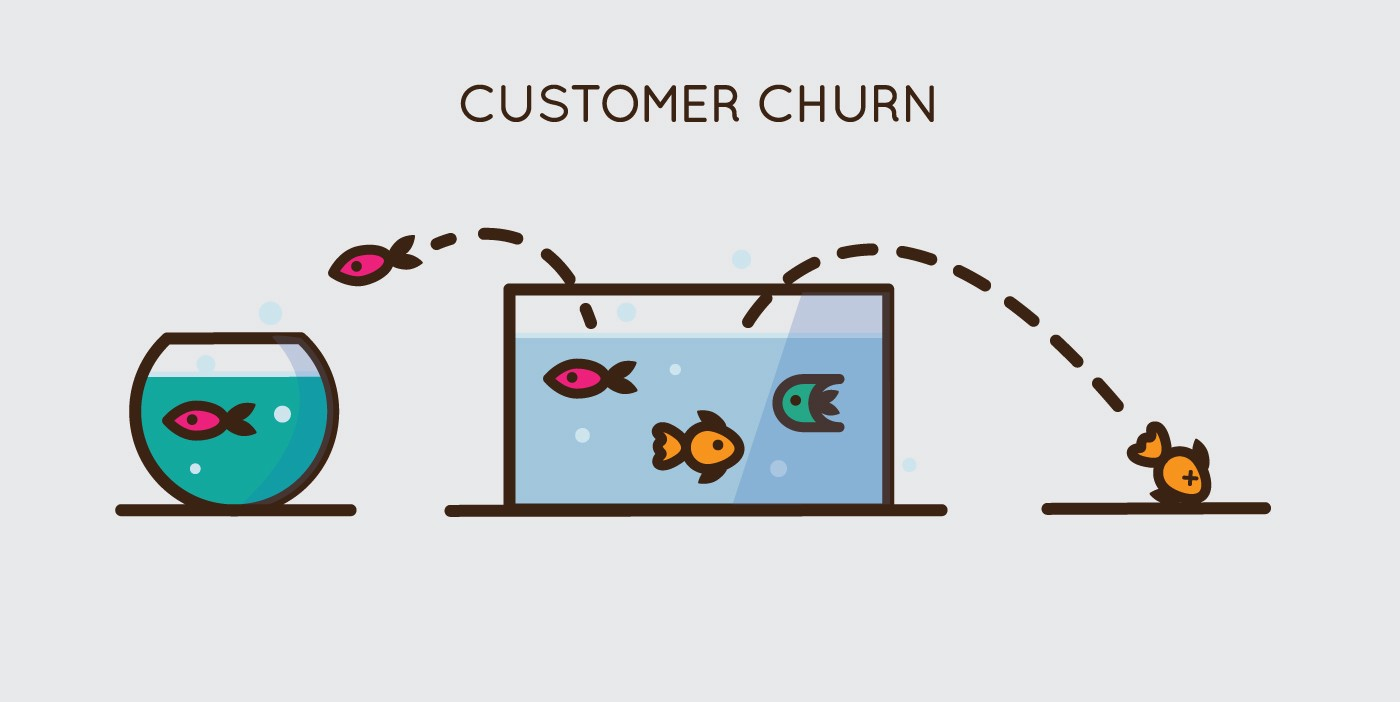

## Descripcion del Dataset

El data set se basa en un conjunto de datos de IBM Telco Customer Churn.


La compañía JB Link, una pequeña empresa de telecomunicaciones en California, enfrenta una alta tasa de churn de clientes lo que significa que muchos clientes están cancelando sus servicios o dejando de usarlos y ha creado un equipo de trabajo, que incluye un equipo de ciencia de datos, para desarrollar una estrategia de retención de clientes. 

El equipo de ciencia de datos se encargará de obtener información de los datos, desarrollar un modelo de aprendizaje automático para predecir la churn de clientes y prescribir acciones personalizadas para retener a cada uno de esos clientes. Los ejecutivos esperan que el proyecto ahorre mucho dinero a la compañía y la haga crecer nuevamente.


### Importacion de librerias utilizadas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go




### Importacion del data set

In [2]:
filename = 'DataSet-Troconiz-E1.csv'
url = "DataSet-Troconiz-E1.csv"
dataset = pd.read_csv(url)



### Muestreo de datos de todas las columnas:

In [3]:
pd.set_option('display.max_columns', 50)
dataset.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   
3              Yes   Fiber Optic                       13              No   
4              Yes         Cable                       15              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   
3           Yes                    Yes                   No          Yes   
4            No                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   
3              Yes              No             No  Month-to-Month   
4               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal          41.236                  39.65   
1               Yes      Credit Card          83.876                 633.30   
2               Yes  Bank Withdrawal          99.268                1752.55   
3               Yes  Bank Withdrawal         102.440                2514.50   
4               Yes  Bank Withdrawal          79.560                2868.15   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   
3          13.43                     327.0                       494.00   
4           0.00                     430.0                       234.21   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents         City  Zip Code   Latitude   Longitude  \
0                     0  Los Angeles     90022  34.023810 -118.156582   
1                     1  Los Angeles     90063  34.044271 -118.185237   
2                     3  Los Angeles     90065  34.108833 -118.229715   
3                     1    Inglewood     90303  33.936291 -118.332639   
4                     1     Whittier     90602  33.972119 -118.020188   

   Population  Churn 

### Informacion referente a las columnas 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Descripcion de las columnas:

## Resumen Estadístico del Conjunto de Datos

El método .describe() de Pandas proporciona un resumen estadístico de alto nivel de las columnas numéricas en un DataFrame. Este resumen incluye la cuenta (número de elementos no nulos), la media, la desviación estándar, los valores mínimos y máximos y los percentiles de las columnas numéricas.

In [5]:
dataset.describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max                            49.990000                94.000000   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count     7043.000000            7043.000000    7043.000000   
mean        65.538800            2280.381264       1.962182   
std         30.606805            2266.220462       7.902614   
min         18.250000              18.800000       0.000000   
25%         35.890000             400.150000       0.000000   
50%         71.968000            1394.550000       0.000000   
75%         90.650000            3786.600000       0.000000   
max        123.084000            8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges          Age  \
count               7043.000000                  7043.000000  7043.000000   
mean                 278.499225                   749.099262    46.509726   
std                  685.039625                   846.660055    16.750352   
min                    0.000000                     0.000000    19.000000   
25%                    0.000000                    70.545000    32.000000   
50%                    0.000000                   401.440000    46.000000   
75%                  182.620000                  1191.100000    60.000000   
max                 6477.000000                  3564.720000    80.000000   

       Number of Dependents      Zip Code     Latitude    Longitude  \
count           7043.000000   7043.000000  7043.000000  7043.000000   
mean               0.468692  93486.070567    36.197455  -119.756684   
std                0.962802   1856.767505     2.468929     2.154425   
min                0.000000  90001.000000    32.555828  -124.301372   
25%                0.000000  92101.000000    33.990646  -121.788090   
50%                0.000000  93518.000000    36.205465  -119.595293   
75%                0.000000  95329.000000    38.161321  -117.969795   
max                9.000000  96150.000000    41.962127  -114.192901   

          Population  Churn Value         CLTV  Total Customer Svc Requests  \
count    7043.000000  7043.000000  7043.000000                  7043.000000   
mean    22139.603294     0.265370  4400.295755                     1.338776   
std     21152.392837     0.441561  1183.057152                     1.430471   
min        11.000000     0.000000  2003.000000                     0.000000   
25%      2344.000000     0.000000  3469.000000                     0.000000   
50%     17554.000000     0.000000  4527.000000                     1.000000   
75%     36125.000000     1.000000  5380.500000                     2.000000   
max    105285.000000     1.000000  6500.000000                     9.000000   

       Product/Service Issues Reported  Customer Satisfaction  
count                      7043.000000            1834.000000  
mean                          0.308107               3.005453  
std                           0.717514               1.256938  
min                           0.000000               1.000000  
25%               

### Visualizacion del abandono

El gráfico 'Distribución de la Tasa de Cancelación' muestra cuántos clientes han abandonado nuestros servicios (valor 1) en comparación con los que permanecen (valor 0). Esta representación nos proporciona una clara imagen de nuestro rendimiento en la retención de clientes, lo que nos permite diseñar estrategias para mejorar nuestra tasa de retención y reducir el abandono.

In [6]:
# Calcular la frecuencia relativa
freq_rel = dataset['Churn Value'].value_counts(normalize=True)
# Convertir a DataFrame y resetear el índice
df_freq_rel = freq_rel.to_frame().reset_index()
df_freq_rel.columns = ['Churn Value', 'Frecuencia Relativa']
fig = px.bar(df_freq_rel, 
             x='Churn Value', 
             y='Frecuencia Relativa', 
             title='Distribución de la Tasa de Cancelación',
             labels={'Churn Value':'Valor de Churn, 0 no abandono, 1 abandono',
                     'Frecuencia Relativa':'Porcentaje'}, 
             color='Churn Value')

fig.update_yaxes(tickformat=".0%")  # Formato de porcentaje en el eje y
fig.update_xaxes(tickvals=[0, 1])
fig.show()




Nuestros datos muestran que de un total de 7043 clientes, 73 %  (5174) han elegido continuar con nuestros servicios, mientras que 26% (1869) han decidido abandonarnos. Aunque la mayoría de nuestros clientes siguen confiando en nosotros, no podemos ignorar que más de una cuarta parte ha optado por alternativas diferentes. Este nivel de abandono resalta la necesidad de mejorar nuestras estrategias de retención de clientes para asegurarnos de mantener nuestra base de clientes y seguir siendo competitivos en el mercado

### Visualizacion de la satifaccion del cliente

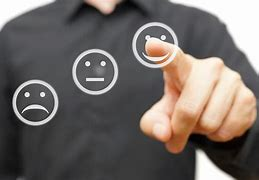

Nuestro gráfico 'Distribución de la Satisfacción del Cliente' representa cómo nuestros clientes califican su experiencia con nuestros servicios, en una escala de 1 a 5. Cada barra del gráfico indica la cantidad de clientes que han dado una puntuación específica, lo que nos permite identificar rápidamente cuál es la satisfacción promedio y ver si la mayoría de nuestros clientes están contentos con lo que ofrecemos. Esta visión nos permite entender mejor nuestras fortalezas y las áreas donde necesitamos mejorar para continuar ofreciendo un servicio de alta calidad a nuestros clientes.

In [7]:
fig = px.histogram(dataset, 
                   x="Customer Satisfaction", 
                   nbins=5,  # Número de barras. 
                   title='Distribución de la Satisfacción del Cliente',
                   labels={'Customer Satisfaction':'Satisfacción del Cliente, mínimo 1, máximo 5', 'count':'Frecuencia'}, 
                   color='Customer Satisfaction')  # Color de las barras. En este caso, se está usando la misma variable de Customer Satisfaction.

fig.show()

In [8]:
conteo_satisfaccion = dataset['Customer Satisfaction'].value_counts().sort_index()
conteo_satisfaccion = conteo_satisfaccion.astype(int)
total_encuestas = conteo_satisfaccion.sum()
porcentaje_satisfaccion = round((conteo_satisfaccion / total_encuestas) * 100, 2)
df_satisfaccion = pd.DataFrame({'Conteo': conteo_satisfaccion, 'Porcentaje (%)': porcentaje_satisfaccion})
df_satisfaccion.loc['Total'] = [total_encuestas, 100.00]
df_satisfaccion.loc['Total', 'Conteo'] = df_satisfaccion.loc['Total', 'Conteo'].astype(int)
df_satisfaccion

Conteo  Porcentaje (%)
1.0     332.0           18.10
2.0     200.0           10.91
3.0     675.0           36.80
4.0     380.0           20.72
5.0     247.0           13.47
Total  1834.0          100.00

Nuestro estudio de la 'Satisfacción del Cliente' se basó en las respuestas de 1834 encuestados. Según los datos recopilados, el nivel de satisfacción más frecuente es 3, representando el 36.80% de las respuestas. Por otro lado, los niveles de satisfacción 1 y 2, que representan experiencias menos satisfactorias, comprenden el 18.10% y 10.91% respectivamente. Los niveles de satisfacción más altos, 4 y 5, representan el 20.72% y 13.47% respectivamente.

Esto sugiere que, aunque la mayoría de nuestros clientes están satisfechos con nuestros servicios (con una calificación de 3 o superior), aún hay un porcentaje significativo que tiene una experiencia menos positiva. Estos hallazgos resaltan la necesidad de continuar nuestros esfuerzos para mejorar la experiencia del cliente y así incrementar el porcentaje de clientes con los más altos niveles de satisfacción.

## Resumen

De las 1834 respuestas recopiladas en la encuesta de satisfacción del cliente, notamos que 532 clientes están insatisfechos o poco satisfechos (niveles de satisfacción 1 y 2). Esto representa cerca del 29% de los encuestados. Además, una proporción significativa de los clientes, alrededor del 37%, tiene una satisfacción neutral (nivel 3). Por otro lado, un 34% de los encuestados están bastante o muy satisfechos con nuestros servicios (niveles 4 y 5). A pesar de este último porcentaje positivo, nos preocupa el segmento insatisfecho y neutral. Por lo tanto, vamos a analizar en detalle la relación entre la satisfacción del cliente y la tasa de abandono, buscando mejorar la experiencia del cliente y reducir la tasa de abandono.

# ¿Existe una relación entre la satisfacción del cliente y la duración de la suscripción?

Hipótesis: Los clientes más satisfechos podrían tener una mayor duración de la suscripción debido a una mejor experiencia con el servicio y una mayor lealtad hacia la empresa.

In [9]:
fig = px.box(dataset, x='Customer Satisfaction', y='Tenure in Months', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Tenure in Months": "Tiempo de Permanencia (Meses)"
                 },
             title='Satisfacción del Cliente vs. Tiempo de Permanencia (Boxplot)')

fig.show()

En general, se aprecia una relación entre la satisfacción y el tiempo de permanencia, lo que podría indicar que los clientes que permanecen con la empresa por más tiempo tienden a estar más satisfechos con el servicio. Sin embargo, también observamos algunos valores atípicos que merecen una investigación más profunda. Además, la distribución de los datos sugiere que podríamos tener problemas específicos con los clientes más nuevos o menos satisfechos que necesitamos abordar.

# ¿Existe una relación entre la tasa de cancelación y la satisfacción del cliente?

Hipótesis: Los clientes menos satisfechos podrían tener una mayor tasa de cancelación debido a insatisfacción con el servicio y una menor lealtad hacia la empresa.

In [10]:
import plotly.express as px

fig = px.box(dataset, y="Customer Satisfaction", 
              title='Boxplot de la Satisfacción del Cliente', 
              labels={"Customer Satisfaction": "Satisfacción del Cliente"})
fig.show()


In [11]:
fig = px.box(dataset, x='Churn Value', y='Customer Satisfaction', 
             labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5"
                 },
             title='Tasa de Cancelación vs. Satisfacción del Cliente (Boxplot)')

fig.show()



Los datos visuales nos proporcionan una relación importante entre la satisfacción del cliente y la tasa de abandono. En particular, observamos que los clientes menos satisfechos tienden a abandonar nuestros servicios con mayor frecuencia. Esto subraya la importancia de nuestro enfoque en mejorar la satisfacción del cliente, ya que parece ser un indicador significativo de la lealtad del cliente. Es crucial que desarrollemos estrategias para aumentar la satisfacción del cliente, que podrían incluir mejorar la calidad del servicio, el soporte al cliente, los precios, entre otros factores. Al hacerlo, esperamos reducir la tasa de abandono y mantener a nuestros valiosos clientes a largo plazo.

# ¿Influye el tiempo de permanencia en la tasa de cancelación?

Hipótesis: Los clientes que permanecen con la empresa por menos tiempo podrían tener una mayor tasa de cancelación debido a una menor satisfacción o lealtad hacia la empresa en comparación con clientes de mayor antigüedad.

In [12]:
mean_tenure = dataset.groupby('Churn Value')['Tenure in Months'].mean().reset_index()

fig = px.line(mean_tenure, x='Churn Value', y='Tenure in Months',
              labels={
                  "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                  "Tenure in Months": "Tiempo de Permanencia Promedio (Meses)"
              },
              title='Tasa de Cancelación vs. Tiempo de Permanencia Promedio')

fig.show()

Se observa una relación entre la tasa de cancelación y el tiempo de permanencia de los clientes. Los datos indican que hay un menor abandono en los primeros meses de la relación con la empresa. Esto enfatiza la importancia de brindar una experiencia excepcional desde el inicio para aumentar la retención de clientes a largo plazo. Al centrar nuestros esfuerzos en mejorar la satisfacción y fidelidad durante las etapas críticas del ciclo de vida del cliente, podemos reducir la tasa de cancelación y fortalecer nuestra base de clientes.

# Análisis de los Factores que Afectan la Satisfacción del Cliente

En este estudio, nos proponemos investigar los diferentes factores que pueden influir en la satisfacción del cliente. Nuestro objetivo es identificar las variables clave que tienen un impacto significativo en la satisfacción del cliente y utilizar estos conocimientos para mejorar la calidad de nuestros productos y servicios. A través de un análisis exhaustivo de nuestros datos, buscaremos patrones y correlaciones que nos ayuden a comprender mejor las necesidades y expectativas de nuestros clientes. Además, exploraremos la relación entre la satisfacción del cliente y variables como la calidad del producto, el tiempo de respuesta del servicio al cliente, la facilidad de uso y otros factores relevantes. Con estos hallazgos, podremos tomar medidas concretas para mejorar la satisfacción del cliente y, en última instancia, fortalecer nuestra relación con ellos.

## ¿Influyen los cargos mensuales en la satisfacción del cliente y la tasa de cancelación?

Hipótesis: Los clientes que pagan cargos mensuales más altos podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a la percepción de un valor insuficiente por su dinero.

In [13]:
fig = px.box(dataset, x='Customer Satisfaction', y='Monthly Charge', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Monthly Charge": "Cargos Mensuales"
                 },
             title='Satisfacción del Cliente vs. Cargos Mensuales (Boxplot)')

fig.show()

In [14]:
import plotly.express as px

fig = px.strip(dataset, x='Churn Value', y='Monthly Charge',
               labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Monthly Charge": "Cargos Mensuales"
                 },
                 title='Tasa de Cancelación vs. Cargos Mensuales (Strip Plot)')

fig.show()


Observamos una correlación evidente en los datos entre cargos mensuales más altos y una disminución en la satisfacción del cliente. Esto indica que a medida que los cargos mensuales aumentan, la satisfacción del cliente tiende a disminuir. Además, notamos que a medida que la satisfacción del cliente disminuye, la tasa de abandono tiende a aumentar. Estos hallazgos sugieren la importancia de considerar cuidadosamente la fijación de precios y la calidad del servicio para mantener la satisfacción del cliente y prevenir el abandono. Es fundamental realizar un análisis más profundo de los factores que influyen en la satisfacción del cliente y utilizar estos conocimientos para tomar medidas concretas y mejorar la experiencia del cliente, tanto en términos de precios competitivos como de calidad del servicio ofrecido.

# ¿Existe una relación entre el número de solicitudes de servicio al cliente y la satisfacción del cliente?

Hipótesis: Los clientes que realizan más solicitudes de servicio al cliente podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a problemas recurrentes con el servicio o producto.

In [15]:
fig = px.box(dataset, x='Customer Satisfaction', y='Total Customer Svc Requests', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Total Customer Svc Requests": "Solicitudes de Servicio al Cliente"
                 },
             title='Satisfacción del Cliente vs. Solicitudes de Servicio al Cliente (Boxplot)')

fig.show()


Existe una relación clara entre la cantidad de solicitudes de servicio al cliente y la satisfacción del cliente. A medida que la satisfacción disminuye, se observa un aumento en las solicitudes de servicio. Esto destaca la importancia de abordar y resolver las preocupaciones de los clientes insatisfechos para mejorar su satisfacción y reducir la necesidad de asistencia adicional. Es crucial enfocar nuestros esfuerzos en mejorar la calidad del servicio y la experiencia del cliente para evitar un aumento en las solicitudes de servicio y mantener una mayor satisfacción del cliente

In [16]:
import plotly.express as px

# Calcular la media de 'Total Customer Svc Requests' para cada 'Churn Value'
mean_requests = dataset.groupby('Churn Value')['Total Customer Svc Requests'].mean().reset_index()

fig = px.line(mean_requests, x='Churn Value', y='Total Customer Svc Requests',
              labels={
                  "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                  "Total Customer Svc Requests": "Solicitudes de Servicio al Cliente"
              },
              title='Tasa de Cancelación vs. Solicitudes de Servicio al Cliente (Line Plot)')

fig.show()


Podemos observar una clara relación entre la cantidad de solicitudes de servicio al cliente y la tasa de cancelación. A medida que aumenta la tasa de cancelación, también aumenta el número de solicitudes de servicio. Esto sugiere que los clientes que tienen más problemas o preocupaciones con nuestro servicio tienen más probabilidades de cancelar su suscripción. Estos hallazgos resaltan la importancia de abordar y resolver de manera efectiva las solicitudes de servicio, ya que esto puede ayudar a reducir la tasa de cancelación y retener a los clientes. Es fundamental mejorar continuamente nuestros procesos y servicios para brindar una experiencia satisfactoria y evitar la necesidad de que los clientes recurran a solicitudes de servicio frecuentes, lo que puede llevar a una mayor tasa de cancelación"

# ¿Existe una relación entre la cantidad de problemas de producto/servicio reportados y la satisfacción del cliente?

Hipótesis: Los clientes que reportan más problemas de producto/servicio podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a la insatisfacción con la calidad del producto o servicio ofrecido.

In [17]:
fig = px.box(dataset, x='Customer Satisfaction', y='Product/Service Issues Reported', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Product/Service Issues Reported": "Problemas de Producto/Servicio Reportados"
                 },
             title='Satisfacción del Cliente vs. Problemas de Producto/Servicio Reportados (Boxplot)')

fig.show()



Podemos observar una clara relación entre la cantidad de problemas de producto/servicio reportados y la satisfacción del cliente. A medida que aumenta la cantidad de problemas reportados, la satisfacción del cliente tiende a disminuir. Esto sugiere que los clientes que experimentan más problemas con nuestros productos o servicios tienen una menor satisfacción general. Estos hallazgos enfatizan la importancia de abordar y resolver de manera efectiva los problemas reportados por los clientes para mejorar su satisfacción. Es fundamental mejorar continuamente la calidad de nuestros productos y servicios, así como la eficacia de nuestro servicio de atención al cliente, para minimizar la cantidad de problemas y garantizar una experiencia satisfactoria para nuestros clientes. Al reducir la cantidad de problemas reportados, podemos aumentar la satisfacción del cliente y fortalecer nuestra relación con ellos a largo plazo

In [18]:
fig = px.box(dataset, x='Churn Value', y='Product/Service Issues Reported', 
             labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Product/Service Issues Reported": "Problemas de Producto/Servicio Reportados"
                 },
             title='Tasa de Cancelación vs. Problemas de Producto/Servicio Reportados (Boxplot)')

fig.show()


Podemos observar una clara relación entre la cantidad de problemas de producto/servicio reportados y la tasa de cancelación. A medida que aumenta la cantidad de problemas reportados, también aumenta la tasa de cancelación. Esto sugiere que los clientes que experimentan más problemas con nuestros productos o servicios tienen una mayor probabilidad de abandonar nuestra empresa. Estos hallazgos destacan la importancia de abordar y resolver de manera efectiva los problemas reportados por los clientes, ya que esto puede ayudar a reducir la tasa de cancelación y retener a los clientes. Es fundamental mejorar continuamente la calidad de nuestros productos y servicios, así como la eficacia de nuestro servicio de atención al cliente, para minimizar la cantidad de problemas y garantizar una experiencia satisfactoria para nuestros clientes. Al reducir la cantidad de problemas reportados, podemos reducir la tasa de cancelación y fortalecer nuestra relación con los clientes

## Mapa de Correlación de Variables Seleccionadas

: En este gráfico de mapa de calor, se muestra la matriz de correlación de un conjunto de variables seleccionadas. Estas variables incluyen el tiempo de permanencia en meses, los cargos mensuales, los cargos por servicios adicionales, la edad del cliente, las solicitudes de servicio al cliente, y otros aspectos relevantes. El mapa de calor resalta las relaciones positivas y negativas entre las variables, lo que nos ayuda a comprender mejor cómo se relacionan y cómo pueden influir en la satisfacción del cliente y la tasa de cancelación. El análisis de correlación es fundamental para identificar patrones y tendencias que pueden ser clave para tomar decisiones informadas en términos de retención de clientes y mejoras en el servicio.

In [19]:
variables_interes = ['Churn Value','Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
                     'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges',
                     'Total Long Distance Charges', 'Age', 'Total Customer Svc Requests',
                     'Product/Service Issues Reported', 'Customer Satisfaction']

# Filtrar el dataframe con las variables seleccionadas
dataset_filtrado = dataset[variables_interes]

# Calcular la matriz de correlación
correlation_matrix = dataset_filtrado.corr()

# Redondear los valores de correlación a 2 decimales
correlation_matrix_rounded = correlation_matrix.round(2)

# Crear el mapa de calor utilizando Plotly
fig = ff.create_annotated_heatmap(z=correlation_matrix_rounded.values,
                                  x=correlation_matrix_rounded.columns.tolist(),
                                  y=correlation_matrix_rounded.columns.tolist(),
                                  colorscale='Viridis')
fig.show()




En base al análisis realizado, No se agregarán más variables al análisis en este momento. El enfoque se centrará en las variables ya seleccionadas.

# API

Para poder hacer el uso de la api se eliminaran las columnas del data frame columns_to_drop = ['City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Gender', 'Age', 'Under 30'] y se traeran estos datos aleatoreamente de una API

In [20]:
# Lista de columnas a eliminar
columns_to_drop = ['City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Gender', 'Age', 'Under 30', 'Customer ID']

# Elimina las columnas
dataset = dataset.drop(columns=columns_to_drop)


Se utilizara una API para obtener los datos de los clientes y comentarios:

In [21]:
import requests
base_url = 'https://randomuser.me/api/'
params = {'inc': 'gender,nat,phone,email,location,name,id', 'results': 5000}

new_dataset = pd.DataFrame()

#iterar 2 veces para obtener los 7043 registros 
#se le agrega un while para solo llenar los 7043
while len(new_dataset) < 7043:
    response = requests.get(base_url, params=params)
    data = response.json()
    api_df = pd.json_normalize(data['results'])

    # Concatena los datos de la API con tu DataFrame existente
    new_dataset = pd.concat([new_dataset, api_df], ignore_index=True)

    # Si la longitud del DataFrame supera 7043, se trunca a 7043
    if len(new_dataset) > 7043:
        new_dataset = new_dataset.iloc[:7043]


In [22]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          7043 non-null   object
 1   email                           7043 non-null   object
 2   phone                           7043 non-null   object
 3   nat                             7043 non-null   object
 4   name.title                      7043 non-null   object
 5   name.first                      7043 non-null   object
 6   name.last                       7043 non-null   object
 7   location.street.number          7043 non-null   int64 
 8   location.street.name            7043 non-null   object
 9   location.city                   7043 non-null   object
 10  location.state                  7043 non-null   object
 11  location.country                7043 non-null   object
 12  location.postcode               7043 non-null   

Se analizan los datos para ver valores duplicados de los id

In [23]:
duplicated_ids = new_dataset["id.value"].duplicated()
print("Number of duplicated IDs:", duplicated_ids.sum())

Number of duplicated IDs: 1377


Se dropean los valores duplicados

In [24]:
new_dataset = new_dataset.drop_duplicates(subset='id.value')

In [25]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          5666 non-null   object
 1   email                           5666 non-null   object
 2   phone                           5666 non-null   object
 3   nat                             5666 non-null   object
 4   name.title                      5666 non-null   object
 5   name.first                      5666 non-null   object
 6   name.last                       5666 non-null   object
 7   location.street.number          5666 non-null   int64 
 8   location.street.name            5666 non-null   object
 9   location.city                   5666 non-null   object
 10  location.state                  5666 non-null   object
 11  location.country                5666 non-null   object
 12  location.postcode               5666 non-null   

In [26]:
dataset['index'] = range(1, len(dataset) + 1)
new_dataset['index'] = range(1, len(new_dataset) + 1)

In [27]:
merged_df = pd.merge(dataset, new_dataset, on='index')

El siguiente data set solo es ilustrativo, para demostrar el uso de la API y no se utilizara para el modelo

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 5665
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  5666 non-null   object 
 1   Number of Referrals                5666 non-null   int64  
 2   Tenure in Months                   5666 non-null   int64  
 3   Offer                              5666 non-null   object 
 4   Phone Service                      5666 non-null   object 
 5   Avg Monthly Long Distance Charges  5666 non-null   float64
 6   Multiple Lines                     5666 non-null   object 
 7   Internet Service                   5666 non-null   object 
 8   Internet Type                      5666 non-null   object 
 9   Avg Monthly GB Download            5666 non-null   int64  
 10  Online Security                    5666 non-null   object 
 11  Online Backup                      5666 non-null   objec

# Predicción del abandono de clientes (Churn Value)

 En este proyecto, nos centraremos en el desafío de predecir el abandono de clientes utilizando técnicas de clasificación binaria. El objetivo es construir un modelo predictivo que pueda identificar de manera efectiva a los clientes que tienen mayor probabilidad de abandonar nuestros servicios (Churn Value igual a 1) en función de diversas características y variables disponibles en nuestros datos.

Exploraremos varios modelos de clasificación, incluyendo la regresión logística, el algoritmo K-Nearest Neighbors (KNN), árboles de decisión, máquinas de vectores de soporte (SVM) y otros. Evaluaremos y compararemos el rendimiento de cada modelo utilizando métricas de evaluación, como la precisión, la sensibilidad y la especificidad.

Este proyecto tiene como objetivo proporcionar información valiosa para la toma de decisiones estratégicas y acciones preventivas para retener a los clientes. Al identificar a los clientes propensos al abandono, podremos implementar estrategias personalizadas para mejorar su experiencia, fortalecer la relación con ellos y, en última instancia, reducir la tasa de cancelación.

A través de este análisis, esperamos obtener un modelo de clasificación preciso y confiable que pueda ayudarnos a predecir el abandono de clientes y tomar medidas proactivas para mantener a nuestros clientes satisfechos y leales.

In [29]:
# Selecciona las características numéricas relevantes y la variable objetivo
feature_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']
X = dataset[feature_columns]
y = dataset['Churn Value']

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena un árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evalúa el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[858 151]
 [141 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1009
           1       0.63      0.65      0.64       400

    accuracy                           0.79      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.79      0.79      0.79      1409

Accuracy Score: 0.7927608232789212


Clasificación de Churn Value (Variable Objetivo):

Precisión para la clase 0 (clientes no churn): 86%
Precisión para la clase 1 (clientes churn): 63%
Recall para la clase 0: 85%
Recall para la clase 1: 65%
F1-score para la clase 0: 0.85
F1-score para la clase 1: 0.64
Precisión general del modelo: 79.28%

Conclusión:

El modelo tiene un rendimiento razonablemente bueno con una precisión general del 79.28%.
El modelo tiene un mejor rendimiento en la clasificación de los clientes no churn (clase 0) en comparación con los clientes churn (clase 1).


In [30]:
# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train, y_train)

# Acceder a las características de importancia
importances = clf.feature_importances_

# Imprimir las características de importancia
print(importances)

[0.19435232 0.38196614 0.16615866 0.01074149 0.10858585 0.13819554]


Se procede a graficarlos y ordenarlos

In [31]:
# Selecciona las características numéricas relevantes y la variable objetivo
feature_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

importances = clf.feature_importances_  # Asumiendo que clf es tu clasificador y tiene los valores de importancia

# Ordena las columnas de características y las importancias en función de las importancias
sorted_columns, sorted_importances = zip(*sorted(zip(feature_columns, importances), key=lambda x: x[1], reverse=True))

# Crea el gráfico de barras horizontales
fig = go.Figure(data=[go.Bar(x=sorted_importances, y=sorted_columns, orientation='h')])

# Personaliza el diseño del gráfico
fig.update_layout(
    title='Importancia de las características en el árbol de decisión',
    xaxis_title='Importancia de las características',
    yaxis_title='Características'
)

# Muestra el gráfico
fig.show()

Estos valores representan la importancia relativa de cada característica en la predicción del clasificador. Los valores más altos indican una mayor importancia de la característica en la toma de decisiones del clasificador. Se utilizara esta información para identificar las características más influyentes en el modelo de árbol de decisión.

In [32]:
# Seleccionar las variables relevantes
selected_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges']

# Crear un nuevo DataFrame con las variables seleccionadas
selected_data = dataset[selected_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Aplicar PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Definir los colores para cada punto
colors = np.where(dataset['Churn Value'] == 0, 'red', 'blue')

# Crear el gráfico de dispersión 2D
fig = go.Figure(data=go.Scatter(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    mode='markers',
    marker=dict(color=colors, opacity=0.1)
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Visualización de datos transformados en dos dimensiones (PCA)',
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2'
)

# Mostrar el gráfico
fig.show()

Componente Principal 1:

Está compuesto por una combinación lineal de las tres variables originales: 'Tenure in Months', 'Monthly Charge' y 'Total Regular Charges'.
El vector de peso para este componente principal es [0.57005388, 0.47897852, 0.66754636].
Este componente captura la mayor varianza en los datos y es el más importante en términos de explicar la estructura de los datos.

Componente Principal 2:

También está compuesto por una combinación lineal de las tres variables originales.
El vector de peso para este componente principal es [0.59824471, -0.79888461, 0.06234301].
Este componente captura la siguiente mayor varianza en los datos después del primer componente principal.

Tenure in Months         0
Monthly Charge           0
Total Regular Charges    0
Churn Value              0
dtype: int64


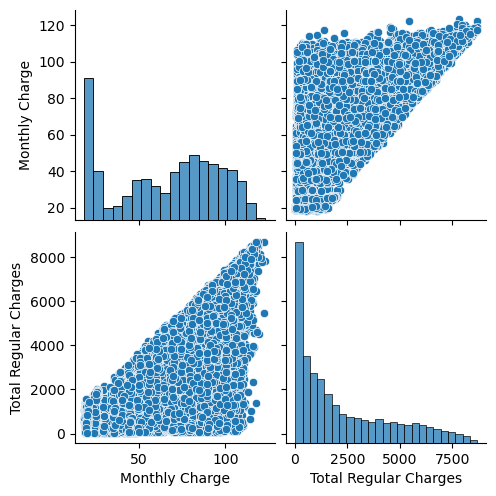

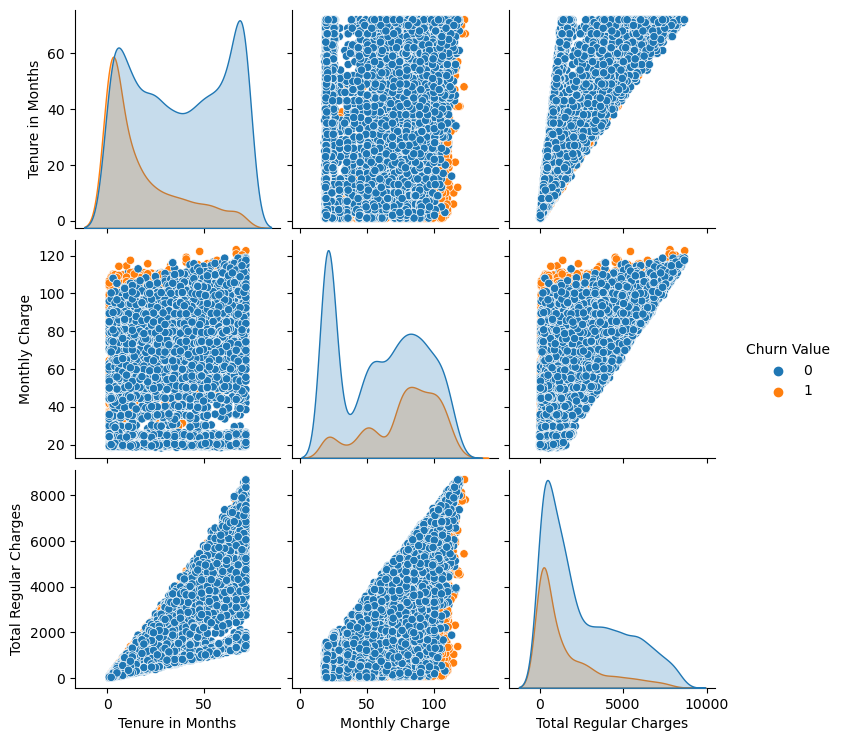

In [33]:

# Seleccionar las variables relevantes
selected_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Churn Value']

selected_data = dataset[selected_columns]

# Verificar si hay valores nulos o faltantes en el conjunto de datos
print(selected_data.isnull().sum())

# Visualizar la distribución de las variables numéricas
sns.pairplot(selected_data.select_dtypes(include=['float64']))

# Visualizar la relación entre las variables y el churn
sns.pairplot(selected_data, hue='Churn Value')


In [34]:

# Crear modelo de regresión
reg_model = LinearRegression()

# Entrenar modelo con los datos de entrenamiento
reg_model.fit(X_train, y_train)

# Predecir valores de la variable dependiente utilizando los datos de prueba
y_pred = reg_model.predict(X_test)

# Calcular el R2
r2 = r2_score(y_test, y_pred)

# Imprimir el resultado
print("R2 Score:", r2)


R2 Score: 0.2706898201165513


El modelo tiene un R2 Score de 0,467 lo que significa que explica alrededor del 47% de la variación en los datos.

In [35]:
# Importar la biblioteca scikit-learn


# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del clasificador KNN
knn = KNeighborsClassifier(n_neighbors=9
                          )

# Entrenar el clasificador con el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del clasificador en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del clasificador
print("Precisión del clasificador KNN:", accuracy)



Precisión del clasificador KNN: 0.845


C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

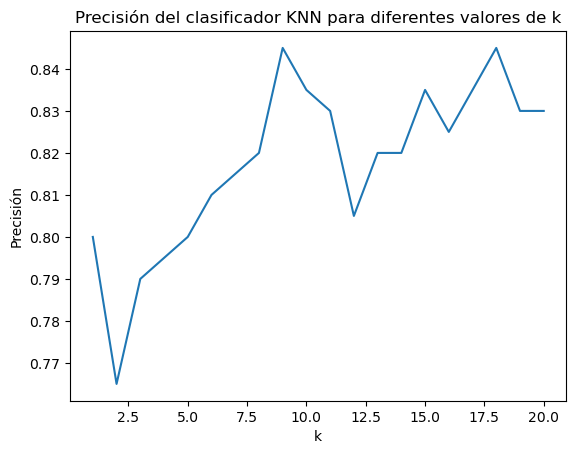

In [36]:


# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los valores de k que deseas probar
k_values = range(1, 21)

# Crear una lista para almacenar las precisiones para cada valor de k
accuracies = []

# Iterar sobre los diferentes valores de k
for k in k_values:
    # Crear una instancia del clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador con el conjunto de entrenamiento
    knn.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Calcular la precisión del clasificador en el conjunto de prueba
    accuracy = np.mean(y_pred == y_test)

    # Agregar la precisión a la lista de precisiones
    accuracies.append(accuracy)

# Graficar la precisión en función de los valores de k
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Precisión')
plt.title('Precisión del clasificador KNN para diferentes valores de k')
plt.show()


Se utilizara el k9

In [37]:


# Crear columna Abandono con valores 1 o 0
#dataset['Abandono'] = np.where(dataset['Churn Value'] == 1, 1, 0)
#dataset.dropna(axis=0, how='any', inplace=True)

# Seleccionar las variables relevantes
selected_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Churn Value']

# Crear un nuevo DataFrame con las variables seleccionadas
selected_data = dataset[selected_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Definir matriz de características X y vector de destino y
X = scaled_data
y = dataset['Churn Value']

# Crear modelo de clasificación KNN con 9 vecinos
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
modelo.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

In [38]:
# Obtenemos las predicciones del modelo
preds = modelo.predict(X)

C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [39]:
preds

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
(preds == y).sum()

7042

In [41]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud del modelo
accuracy = accuracy_score(y, preds)

print(f"La exactitud del modelo es: {accuracy * 100:.2f}%")


La exactitud del modelo es: 99.99%


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, preds)
recall = recall_score(y, preds)
f1 = f1_score(y, preds)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")


Precision: 100.00%
Recall: 99.95%
F1-score: 99.97%


In [43]:
n_samples, n_features = X.shape

print(f"Se usaron {n_samples} datos para entrenar el modelo.")


Se usaron 7043 datos para entrenar el modelo.


Debido a que para la prueba se uso la misma data del modelo el acurrancy es del 100%, por ende se separara la data en train y test 

In [44]:
# Separamos en entrenamiento/test en razon 70/30 %
#0-100  0-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False) 

In [45]:
X_train.shape

(4930, 7)

In [46]:
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [47]:
preds_test = modelo.predict(X_test)

C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [48]:
(preds_test == y_test).sum()

2112

In [49]:
(preds_test == y_test).sum()/y.sum()*100

113.0016051364366

In [50]:
accuracy_test = accuracy_score(y_test, preds_test)

print(f"La exactitud del modelo en el conjunto de prueba es: {accuracy_test * 100:.2f}%")


La exactitud del modelo en el conjunto de prueba es: 99.95%


In [51]:

# Predecir con los datos de prueba
preds_test = modelo.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, preds_test)

# Calcular la precisión, el recall y el F1-score en el conjunto de prueba
precision_test = precision_score(y_test, preds_test)
recall_test = recall_score(y_test, preds_test)
f1_test = f1_score(y_test, preds_test)

print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1-score: {f1_test * 100:.2f}%")

Accuracy: 99.95%
Precision: 0.00%
Recall: 0.00%
F1-score: 0.00%


C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\jtroc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



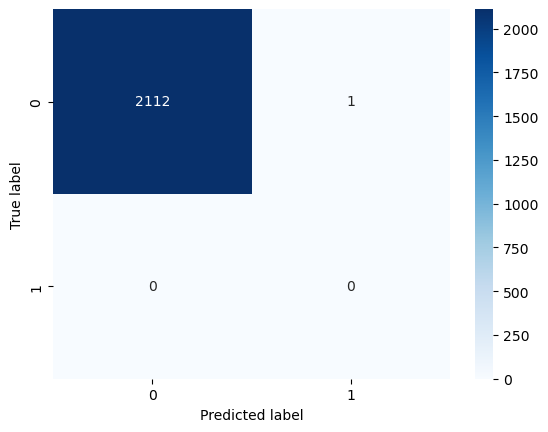

<Figure size 1000x600 with 0 Axes>

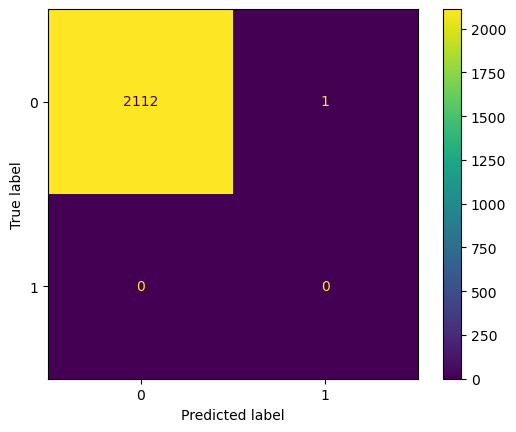

In [52]:
# Calcular y visualizar la matriz de confusión
cm = confusion_matrix(y_test, preds_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, preds_test, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()
plt.show()


El hecho de tener una exactitud (Accuracy) del 99.95%, pero con una precisión, recall y F1-score de 0.00% indica que hay un problema en la evaluación del modelo. Sin embargo, no necesariamente implica que el modelo tenga un problema de sobreajuste (overfitting).

En este caso, el problema parece ser un desequilibrio en las clases de los datos, lo que provoca que el modelo no pueda predecir correctamente la clase minoritaria (abandono de clientes). La métrica de exactitud no es la mejor medida de rendimiento en este caso, ya que puede dar una impresión engañosa de un buen rendimiento cuando el modelo simplemente predice la clase mayoritaria (no abandono).

Matriz de confusión:
[[2113]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



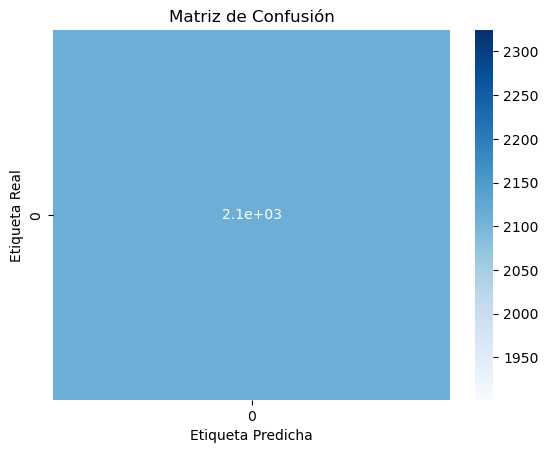

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un objeto de la clase SVC con un núcleo específico (por ejemplo, 'rbf')
modelo = SVC(kernel='rbf')

# Entrenar el modelo usando los datos de entrenamiento (X_train, y_train)
modelo.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba (X_test)
predicciones = modelo.predict(X_test)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)
print("Matriz de confusión:")
print(matriz_confusion)

# Informe de clasificación
reporte_clasificacion = classification_report(y_test, predicciones)
print("Informe de clasificación:")
print(reporte_clasificacion)

# Visualización de la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()



El modelo SVM ha obtenido un rendimiento perfecto en la clasificación de la clase 0 en el conjunto de prueba. Todas las predicciones coinciden con las etiquetas reales, lo que se refleja en una matriz de confusión con un solo elemento de 2113. Además, todas las métricas de precisión, recuperación y puntaje F1 tienen un valor de 1, lo que indica un rendimiento excelente del modelo. En resumen, el modelo SVM ha demostrado una capacidad de clasificación perfecta para la clase 0 en este conjunto de prueba.

K-means silhouette score for k = 2 :  0.39533396161100065
K-means silhouette score for k = 3 :  0.42367875578062864
K-means silhouette score for k = 4 :  0.4010040681701614
K-means silhouette score for k = 5 :  0.36107230176841454
K-means silhouette score for k = 6 :  0.349104619325899
K-means silhouette score for k = 7 :  0.3408311699962871
K-means silhouette score for k = 8 :  0.3415226726544426
K-means silhouette score for k = 9 :  0.3366729745185902
Best k value based on silhouette score: 3


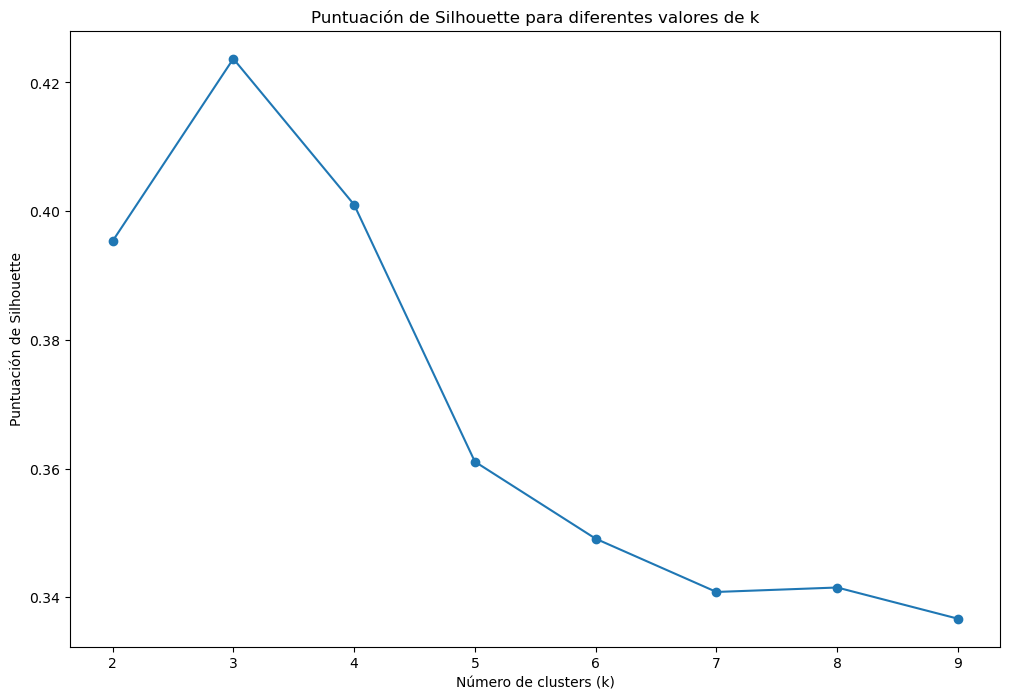

In [54]:


# Selecciona las columnas que deseas incluir en el clustering
feature_columns = ['Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

# Escala tus datos para que tengan media cero y varianza uno (opcional pero recomendado)
scaler = StandardScaler()
X = scaler.fit_transform(dataset[feature_columns])

# Crea una lista de valores de k para iterar
k_values = range(2, 10)

# Itera sobre los diferentes valores de k y almacena la puntuación de Silhouette en una lista
silhouette_scores = []
for k in k_values:
    # Crea el modelo de K-means con el valor de k actual
    kmeans = KMeans(n_clusters=k,n_init=50, random_state=42)
    kmeans.fit(X)
    
    # Calcula la puntuación de Silhouette del modelo actual y agrega a una lista
    silhouette_score_kmeans = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_score_kmeans)
    
    # Imprime la puntuación de Silhouette del modelo actual
    print("K-means silhouette score for k =", k, ": ", silhouette_score_kmeans)

# Encuentra el mejor valor de k
best_k = k_values[np.argmax(silhouette_scores)]
print("Best k value based on silhouette score:", best_k)

# Visualiza los valores de la puntuación de Silhouette para cada valor de k
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values, silhouette_scores, marker='o')
ax.set_xlabel('Número de clusters (k)')
ax.set_ylabel('Puntuación de Silhouette')
ax.set_title('Puntuación de Silhouette para diferentes valores de k')
plt.show()


Segun el metodo K-means + silhouette se puede observar que no hay una clara agrupacion de los datos.

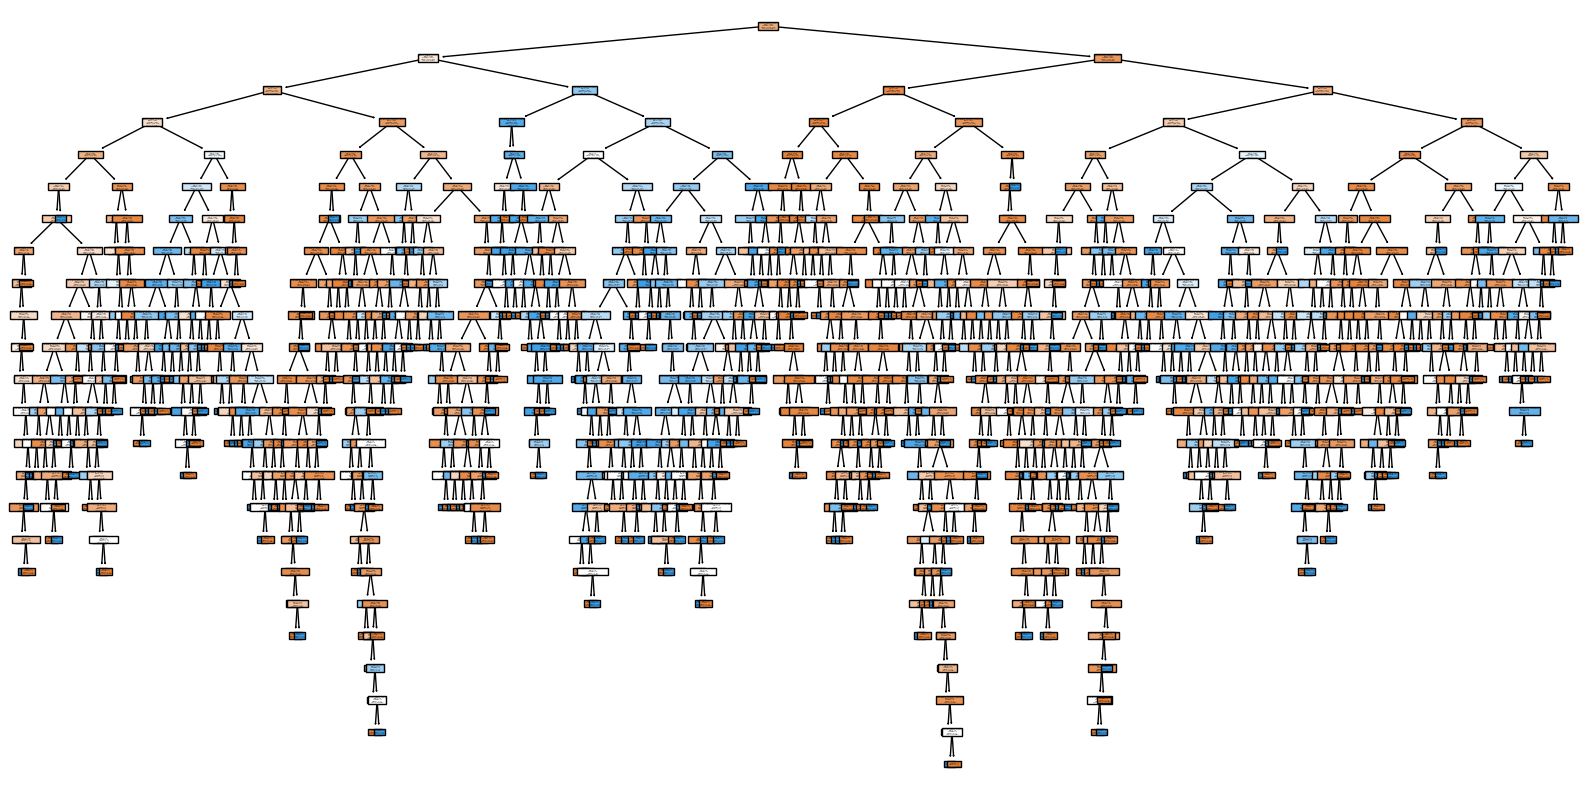

In [55]:
# Visualiza el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

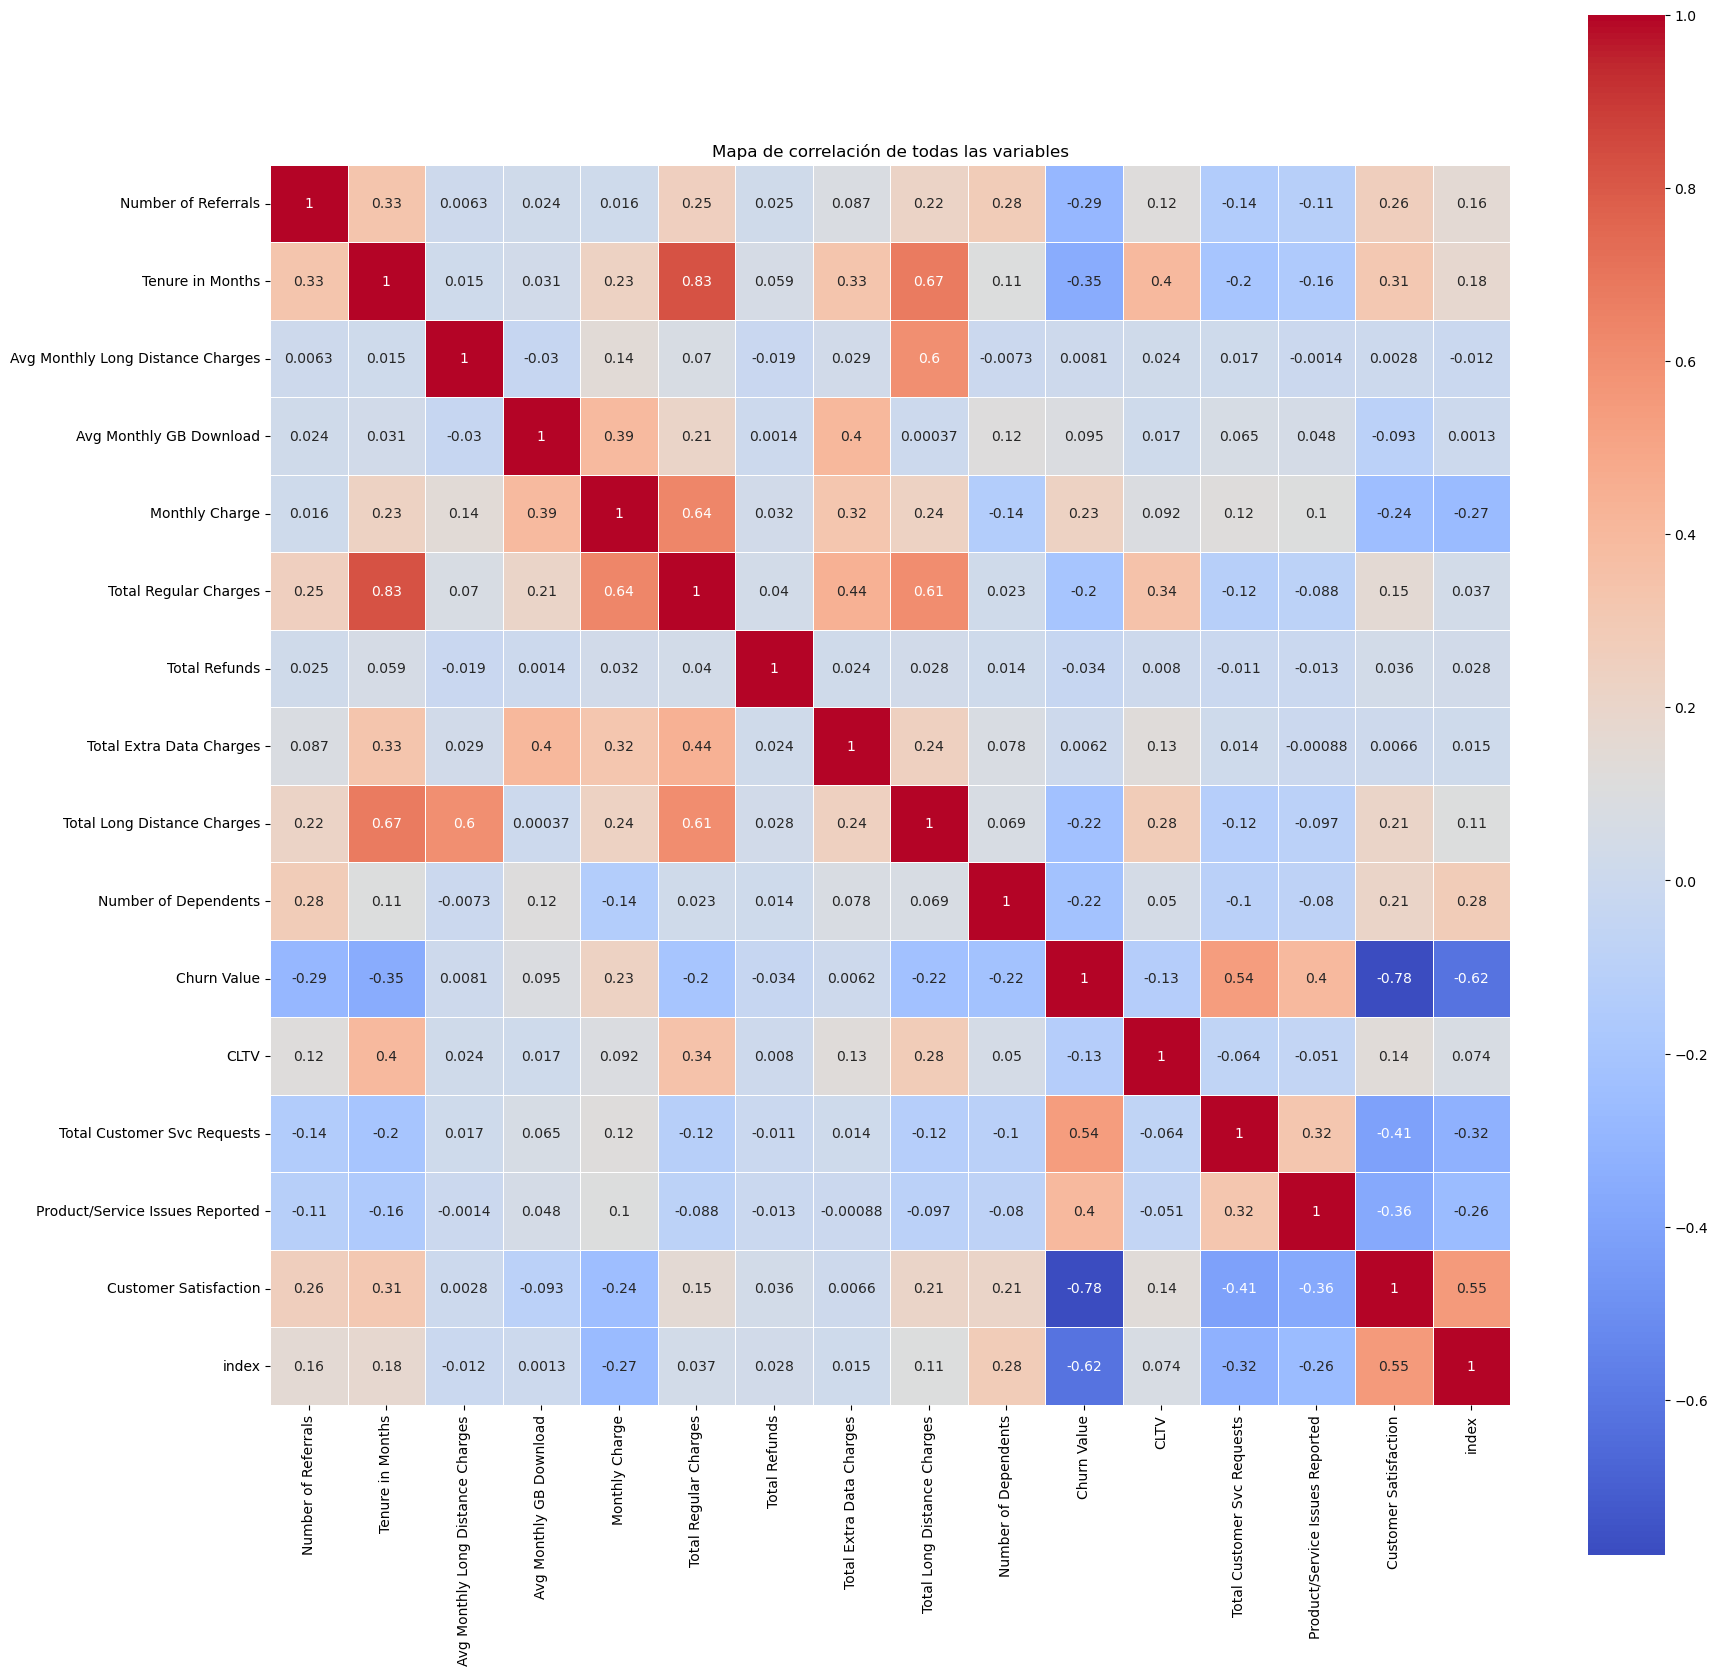

In [56]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, square=True)

plt.title("Mapa de correlación de todas las variables")
plt.show()